In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GlobalLandTempByState.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
us_mask = df['Country'] == 'United States'
us_df = df[us_mask].copy()
us_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [5]:
year_mask = us_df['dt'] > "1950"
year_us_df = us_df[year_mask].copy()

In [6]:
year_us_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
9932,1950-01-01,14.996,0.162,Alabama,United States
9933,1950-02-01,11.922,0.134,Alabama,United States
9934,1950-03-01,11.501,0.196,Alabama,United States
9935,1950-04-01,15.056,0.196,Alabama,United States
9936,1950-05-01,23.116,0.256,Alabama,United States


In [7]:
from datetime import datetime

def convert_date_to_datetime(string_time):
    return datetime.strptime(string_time,'%Y-%m-%d')

year_us_df['dt'] = year_us_df.dt.apply(convert_date_to_datetime)

In [8]:
year_us_df['year'] = year_us_df['dt'].apply(lambda x: x.year)
year_us_df['month'] = year_us_df['dt'].apply(lambda x: x.month)
year_us_df['avg_temp_f'] = year_us_df['AverageTemperature'].map(lambda x: ((1.8*x) + 32))
year_us_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,year,month,avg_temp_f
9932,1950-01-01,14.996,0.162,Alabama,United States,1950,1,58.9928
9933,1950-02-01,11.922,0.134,Alabama,United States,1950,2,53.4596
9934,1950-03-01,11.501,0.196,Alabama,United States,1950,3,52.7018
9935,1950-04-01,15.056,0.196,Alabama,United States,1950,4,59.1008
9936,1950-05-01,23.116,0.256,Alabama,United States,1950,5,73.6088


In [9]:
july_mask = (year_us_df['month'] == 7)
july_df = year_us_df[july_mask]

In [10]:
july_mean = july_df.groupby(['year']).avg_temp_f.agg(['mean']).reset_index()

Text(0.5,1,'Average US Tempurature in July Since 1950')

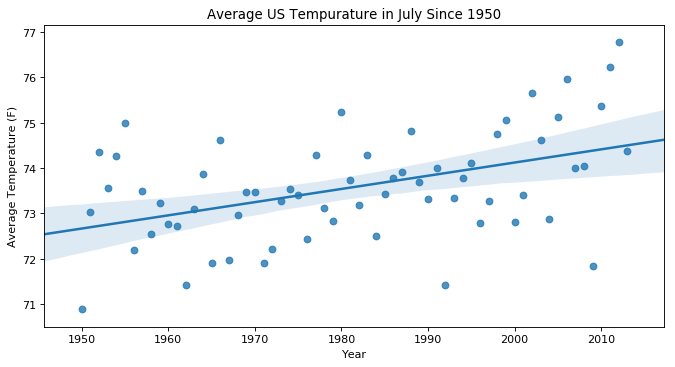

In [11]:
plt.figure(figsize=(10, 5), dpi=80)
sns.regplot(july_mean['year'], july_mean['mean'])
plt.xlabel('Year')
plt.ylabel('Average Temperature (F)')
plt.title('Average US Tempurature in July Since 1950')

In [12]:
jan_mask = (year_us_df['month'] == 1)
jan_df = year_us_df[jan_mask]

In [13]:
jan_mean = jan_df.groupby(['year']).avg_temp_f.agg(['mean']).reset_index()

Text(0.5,1,'Average US Tempurature in January Since 1950')

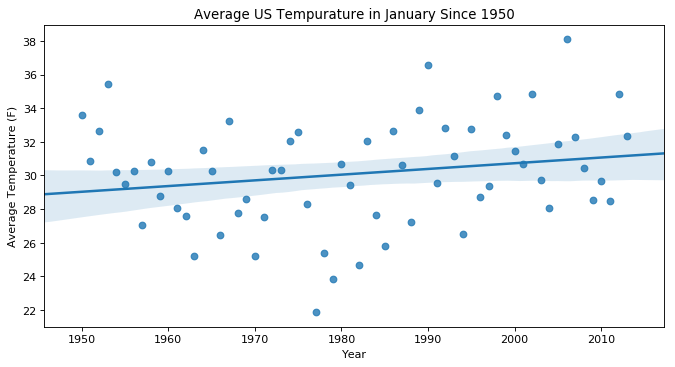

In [14]:
plt.figure(figsize=(10, 5), dpi=80)
sns.regplot(jan_mean['year'], jan_mean['mean'])
plt.xlabel('Year')
plt.ylabel('Average Temperature (F)')
plt.title('Average US Tempurature in January Since 1950')